## Exercises chapter 5.3

## Pre-exercise

How does the head change at 400 m from the river due to a sudden change of 4 m of the river stage which lasts 2 days.

+ kD = 900 m2/d
+ S  = 0.1
+ A  = 4 m
+ L = 400 m

Our solution is

$$ s(x,t)  = A \, erfc(u), \,\,\, u = \sqrt{ \frac {x^2 S} {4 kD t} } $$



In [3]:
# import our functionality
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

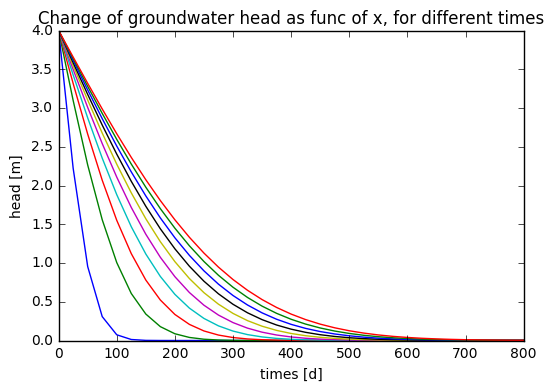

In [14]:
kD = 900. # m2/d
S = 0.1
A = 4.0
times = np.linspace(0.1, 3, 10) # d
L = 800. #m
x = np.linspace(0, 800, 33)

for t in times:
    u = np.sqrt(x**2 * S/(4 * kD * t))
    s = A * erfc(u)
    plt.plot(x, s)

plt.xlabel('times [d]')
plt.ylabel('head [m]')
plt.title('Change of groundwater head as func of x, for different times')
plt.show()

The flux is

$$ Q = -kD \frac {\partial s} {\partial x} = A \sqrt{\frac {kD S} {\pi t} } e^{-u^2} $$  

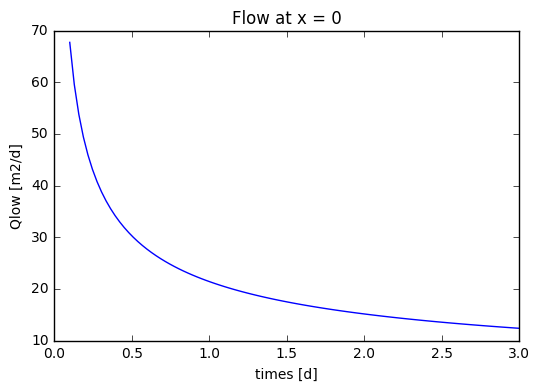

In [16]:
times = np.linspace(0.1, 3, 100) # d
Q0  = A * np.sqrt( kD * S / (np.pi * times))
plt.xlabel('times [d]')
plt.ylabel('Qlow [m2/d]')
plt.title('Flow at x = 0')
plt.plot(times, Q0)
plt.show()

How about the situation that after 2 days the river stage falls suddenly back to zero??

/Users/Theo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


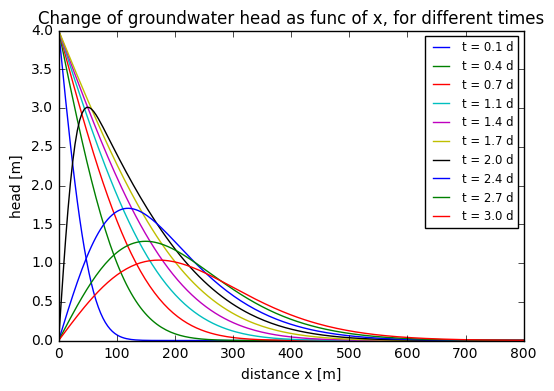

In [36]:
kD = 900. # m2/d
S = 0.1
A = 4.0
times = np.linspace(0.1, 3, 10) # d
L = 800. #m
x = np.linspace(0, 800, 200)
dt = 2 # delay, sudden fall back of river stage

for t in times:
    u1 = np.sqrt(x**2 * S/(4 * kD * t))    
    u2 = np.sqrt(x**2 * S/(4 * kD * (t - dt)))
    s = A * erfc(u1)
    if t> dt:
        s = s -A * erfc(u2)
    plt.plot(x, s, label='t = {:.1f} d'.format(t))

plt.xlabel('distance x [m]')
plt.ylabel('head [m]')
plt.title('Change of groundwater head as func of x, for different times')
plt.legend(fontsize='small')
plt.show()

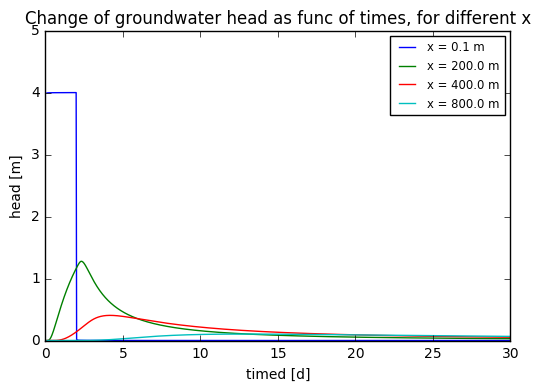

In [38]:
kD = 900. # m2/d
S = 0.1
A = 4.0
times = np.linspace(0.1, 30, 1000) # d
L = 800. #m
distances = [0.1, 200, 400, 800]
dt = 2 # delay, sudden fall back of river stage

period2 = times>dt

for x in distances:
    u1 = np.sqrt(x**2 * S/(4 * kD * times))    
    u2 = np.sqrt(x**2 * S/(4 * kD * (times[period2] - dt)))
    s = A * erfc(u1)
    s[period2] = s[period2] -A * erfc(u2)
    plt.plot(times, s, label='x = {:.1f} m'.format(x))

plt.ylim(0, 5)
plt.xlabel('timed [d]')
plt.ylabel('head [m]')
plt.title('Change of groundwater head as func of times, for different x')
plt.legend(fontsize='small')
plt.show()

### Exercise p51-1

1. All drawdown due to a sudden change of river state are expressedin a simple erfc-function. Can you express the argument u using a ratio of the distance $x$ from teh river and some characteristic distance $X$ that is valid for a fixed time?

    $$ s(x,t) = s_0 \, erfc(u), \,\,\,\,\,u = \sqrt {\frac {x^2 S} {4 kD t}} $$

    just write  $u = \frac x X$, so that $X= \sqrt {\frac {4 kD t} S} = \sigma \sqrt 2$

1. What is the ratio of $\frac x X$ for $s(x,t)= 0.5 s_0$ ?

    So try values for x/X to find the value for which erfc(x/X) = 0.5.

1. How could you express the drawdown as a ration between time and a characteristic time $T$ for a fixed distance $x$?

    $$ u = \sqrt{\frac {x^2 S} {4 kD t}} = \sqrt {\frac T t} $$

    with 

    $$ T = \frac {x^2 S} {4 kD} $$ 

1. What is the ratio of $\frac t T$ for $s(x,t) = 0.5s_0$ ?

1. At what time, expressed in terms of t/T would you expect the head to change at a given distance, x=??

1. Given the mathematical expression for the drawdown, derive yourself the expression for the discharge $Q(c, t)$

1. Assume that:
    + $kD = 400$ m2/d
    + $S = 0.1$
    + $A = 2.0$ m 
    
    Show the effect of this change at x = 10, 100 and 1000 m.

### Excercise p53-12

How long will it take until the head in the center of a 10 m thick aquitard with resistance  $c=5000$ d has reached half the head change suddenly applied at both its top and its bottom?

### Exercise p56

Consider a situation with $kD= 400$ m2/d and $S_y=0.1$. The watr level A = [1.0, -0.5, +0.5, -0.25] at t=[0.5, 0.8,1.0, 2.0] d.
1. Show the groundwater level as a function of time for $x=50$ m for $0\le t \le 5$ d. 


### Exercise p62_1

Set up a mirror scheme for the case of a strip of land bounded by straight surface water on either side, where the surface water stage (level) of the right-hand side canal suddenly changes by a fixed value.
+ $L = 500$ m
+ $kD = 600$ m2/d
+ $S_y = 0.2$
+ $A = 1.0$ m


1. Show the head change for a number of times.
1. Show on the hand of the obtained mirror scheme that the result is correct, i.e. that the result with all its mirror strips matches the boundary conditions exactly.

### Exercise concerning section 5.6

1. Set up a mirror scheme for the case of a strip of land bounded by straight surface water on either side, where the surface water stage on both sides is suddenly lowered by A m
1. Compute the same situation with the equation at the bottom of page63.
1. Show that both yield exactly the same numerical results.


### Exercise, section 5.6.2

Derive the characteristic time and half time for the groundwater basin yourself.

### Exercise, equation 5.15

Show a few of the terms of equation 5.15